In [52]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from keras.layers import Dense, Conv1D,Flatten,GlobalAveragePooling1D,MaxPooling1D
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint
from tensorflow import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import GaussianNoise
import h5py
from keras.models import model_from_json
import pathlib
import os
from collections import Counter


#Read the Data

In [53]:

#Read CSV file containing all the data

filepath=r"/content/All_results_6000.csv"

#Skip first two rows which contain the titles and col names
df=pd.read_csv(filepath,skiprows=2)


#Either select all available rows or skip some of them

**Case1**: Select all available rows

In [54]:


#Select all columns parrallel to the X direction

filter_colX = [col for col in df if col.endswith('to X')]


# Mean value of strain for columns parallel to x: 0.000185
#Se lo restamos a las columnas paralelas al X

for col in filter_colX:
  df[col]=df[col]-0.000185




#el valor medio del strain para los valores 'parallel to Y' es :   df[col]=df[col]-0.00006985


#Select all columns parrallel to the Y direction
filter_colY = [col for col in df if col.endswith('to Y')]


for col in filter_colY:
  df[col]=df[col]-0.00006985







# The model input will consist of all the columns parallel to X and Y directions

input_cols=[]
input_cols= filter_colX+ filter_colY



# Definne the target columns: Defect Lx, Defect Ly, Defect Center X Coord, Defect Center Y Coord
target_cols= []


#Los columnas que contiene el output 
for col in df.columns:
  if col not in input_cols:
    target_cols.append(col)



y=df[target_cols].values
X= df[input_cols].values


print("input_features: ",X.shape[1])




input_features:  66


# Select number of rows (Random Selection)

In [55]:
df = df.sample(n=6000)
df.shape

(6000, 70)

**Case2**: Don't select all available rows

In [41]:

#filterx=[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]


#filtered_listX=[]
#for item in filterx:
#  tmp= "ply-11-"+str(item)+"-parallel to X"
#  filtered_listX.append(tmp)



#for col in filtered_listX:
#  df[col]=df[col]-0.000185




#el valor medio del strain para los valores 'parallel to Y' es :   df[col]=df[col]-0.00006985







#filtery=target_cols=[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34]


#filtered_listY=[]
#for item in filterx:
#  tmp= "ply-11-"+str(item)+"-parallel to Y"
#  filtered_listY.append(tmp)




##################################
##################################
# En caso de querer filtrar y obtener solo las columnas pares

#pattern= ".*[02468]+[^13579]"


#r = re.compile(pattern)
#filtered_listY = list(filter(r.match, filter_colY))







#for col in filtered_listY:
#  df[col]=df[col]-0.00006985

##################################
##################################




#input_cols=[]



#input_cols= filter_colX+ filter_colY

#input_cols=filtered_listY+filtered_listY


#target_cols=[]



#Los columnas que contiene el output 
#for col in df.columns:
#  if col not in input_cols:
#    target_cols.append(col)



#y=df[target_cols].values
#X= df[input_cols].values


#Train, Test Split

In [56]:


x_train,x_test,y_train,y_test= train_test_split (X,y,test_size=0.1,random_state=42)


x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)




#Data Scaling
- It transforms the data in such a manner that it has mean as 0 and standard deviation as 1.

- In short, it standardizes the data. Standardization is useful for data which has negative values. 

- It arranges the data in a standard normal distribution.

In [57]:

#It transforms the data in such a manner that it has mean as 0 and standard deviation as 1.
#In short, it standardizes the data. Standardization is useful for data which has negative values. 
#It arranges the data in a standard normal distribution.
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)



sample_size = x_train.shape[0] # number of samples in train set
features  = x_train.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

x_train = x_train.reshape(sample_size,features,input_dimension)






x_test=x_test.reshape(x_test.shape[0], x_test.shape[1], 1)







scalery = StandardScaler()
y_train=scalery.fit_transform(y_train.reshape(-1,y_test.shape[1]))
y_test = scalery.transform(y_test.reshape(-1,y_train.shape[1]))





print("input_shape: (", x_train.shape[1], x_train.shape[2], ")")

print("output_shape: (", y_train.shape[1])


input_shape: ( 66 1 )
output_shape: ( 4


# DEFINE THE KERAS MODEL

In [58]:


class CustomModel():
    def __init__(self,input_shape,output_dim,lr,decay_rate):
        self.input_shape=input_shape  # (dimensions,1)
        self.output_dim=output_dim
        self.lr=lr
        self.decay_rate= decay_rate
        self.model=None
        self.build()


    def build(self):
      #self.model.add(keras.layers.Input(shape=(72,1)))
      inputs=tf.keras.Input(self.input_shape,name='input')

      #Conv Layer 1
      conv_1= layers.Conv1D(filters=64, kernel_size=3, padding='valid',name='conv_1')(inputs)
      conv_1= layers.BatchNormalization()(conv_1)
      conv_1= layers.Activation('relu')(conv_1)
      pool_1=layers.MaxPooling1D(pool_size= 2,name= 'pool_1')(conv_1)


      #Conv Layer 2
      conv_2= layers.Conv1D(filters=64, kernel_size=3, padding='valid',name='conv_2')(pool_1)
      conv_2= layers.BatchNormalization()(conv_2)
      conv_2= layers.Activation('relu')(conv_2)
      pool_2=layers.MaxPooling1D(pool_size= 2,name= 'pool_2')(conv_2)


      #Conv Layer 3
      conv_3= layers.Conv1D(filters=64, kernel_size=3, padding='valid',name='conv_3')(pool_2)
      conv_3= layers.BatchNormalization()(conv_3)
      conv_3= layers.Activation('relu')(conv_3)
      pool_3=layers.MaxPooling1D(pool_size= 2,name= 'pool_3')(conv_3)


      #Flattening
      flat= layers.Flatten(name='flatten')(pool_3)


      #Dropout
      flat=layers.Dropout(0.1)(flat)


      #Fully-connected

      dense=layers.Dense(32,activation='softmax')(flat)

      outputs=layers.Dense(4)(dense)


     #Build model

      self.model=tf.keras.Model(inputs=inputs,outputs=outputs,name='CNN')



      self.model.compile(loss="mean_squared_error",optimizer=SGD(learning_rate=self.lr,decay=self.decay_rate),\
                    metrics=['accuracy',metrics.mean_squared_error, metrics.mean_absolute_error, \
                             metrics.mean_absolute_percentage_error, metrics.cosine_proximity])
      
      self.model.summary()
      return self.model






    def Fit(self,X_train,Y_train,batch_size,epochs,validation_data):
      history=self.model.fit(X_train,Y_train,batch_size=batch_size,validation_data=validation_data,epochs=epochs)
      return history




    def Predict(self,X_test):
      return(self.model.predict(X_test))

    def Evaluate(self,X_test, Y_test):
      batch_size=128
      return self.model.evaluate(x_test, y_test, batch_size)

    
    def History(self,key):
      #return history.history.keys()
      return history.history[key]
      #print(history.history.keys())
     # print(history.history())

    

#Define Model Parameters

In [59]:

epochs=1000

lr=0.1

decay_rate=1E-6

batch_size=32

validation_data=(x_test, y_test)
input_shape=(x_train.shape[1],x_train.shape[2])
output_dim= y_train.shape[1]

model = CustomModel(input_shape,output_dim,lr,decay_rate)






Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 66, 1)]           0         
                                                                 
 conv_1 (Conv1D)             (None, 64, 64)            256       
                                                                 
 batch_normalization_16 (Bat  (None, 64, 64)           256       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 64, 64)            0         
                                                                 
 pool_1 (MaxPooling1D)       (None, 32, 64)            0         
                                                                 
 conv_2 (Conv1D)             (None, 30, 64)            12352     
                                                               

In [ ]:
history= model.Fit(x_train,y_train,batch_size,epochs,validation_data)

Epoch 1/1000
169/169 [==============================] - 2s 8ms/step - loss: 0.6454 - accuracy: 0.4980 - mean_squared_error: 0.6454 - mean_absolute_error: 0.6660 - mean_absolute_percentage_error: 173.0740 - cosine_proximity: 0.6890 - val_loss: 0.8780 - val_accuracy: 0.5067 - val_mean_squared_error: 0.8780 - val_mean_absolute_error: 0.8061 - val_mean_absolute_percentage_error: 112.7022 - val_cosine_proximity: 0.6009
Epoch 2/1000
169/169 [==============================] - 1s 6ms/step - loss: 0.4427 - accuracy: 0.5676 - mean_squared_error: 0.4427 - mean_absolute_error: 0.5293 - mean_absolute_percentage_error: 207.4218 - cosine_proximity: 0.7891 - val_loss: 0.4792 - val_accuracy: 0.6067 - val_mean_squared_error: 0.4792 - val_mean_absolute_error: 0.5618 - val_mean_absolute_percentage_error: 105.7249 - val_cosine_proximity: 0.8222
Epoch 3/1000
169/169 [==============================] - 1s 6ms/step - loss: 0.3735 - accuracy: 0.5978 - mean_squared_error: 0.3735 - mean_absolute_error: 0.4740 - m

In [47]:



################################
#Model Evaluation
################################





def evaluate_metrics(model,X_test,y_test):
  X_test = sc_X.inverse_transform(X_test)
  Y_test= scalery.inverse_transform(y_test)
  return model.Evaluate(X_test, Y_test)


#Evaluate the created model
#Loss, Accuracy, MSE, PME



x_test=x_test.reshape(x_test.shape[0], x_test.shape[1])
metric_scores=evaluate_metrics(model,x_test,y_test)


y_test= scalery.inverse_transform(y_test)
y_train= scalery.inverse_transform(y_train)





5/5 [==============================] - 0s 5ms/step - loss: 0.0394 - accuracy: 0.9367 - mean_squared_error: 0.0394 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 35.7743 - cosine_proximity: 0.9847



 Loss on on Validation data (Test Data):   0.03940243273973465

 Loss on Training data:   0.010031197220087051


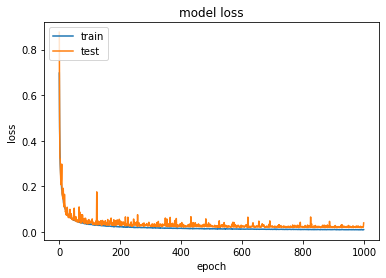

In [48]:

# summarize history for accuracy






# summarize history for loss
plt.plot(model.History('loss'))
plt.plot(model.History('val_loss'))
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


val_loss= model.History('val_loss')[-1]
loss=model.History('loss')[-1]
print("\n Loss on on Validation data (Test Data):  ",model.History('val_loss')[-1])
print("\n Loss on Training data:  ",model.History('loss')[-1])

plt.savefig("D.pdf")
plt.show()


